Epoch 1/20
582/582 [==============================] - 50s 68ms/step - loss: 0.6566 - accuracy: 0.6049 - val_loss: 0.5952 - val_accuracy: 0.6840
Epoch 2/20
582/582 [==============================] - 22s 37ms/step - loss: 0.5791 - accuracy: 0.6969 - val_loss: 0.5084 - val_accuracy: 0.7487
Epoch 3/20
582/582 [==============================] - 26s 44ms/step - loss: 0.5303 - accuracy: 0.7364 - val_loss: 0.4729 - val_accuracy: 0.7732
Epoch 4/20
582/582 [==============================] - 22s 37ms/step - loss: 0.4943 - accuracy: 0.7611 - val_loss: 0.4470 - val_accuracy: 0.8027
Epoch 5/20
582/582 [==============================] - 21s 36ms/step - loss: 0.4618 - accuracy: 0.7800 - val_loss: 0.3814 - val_accuracy: 0.8302
Epoch 6/20
582/582 [==============================] - 22s 37ms/step - loss: 0.4230 - accuracy: 0.8046 - val_loss: 0.3712 - val_accuracy: 0.8293
Epoch 7/20
582/582 [==============================] - 22s 37ms/step - loss: 0.3980 - accuracy: 0.8188 - val_loss: 0.3658 - val_accuracy:

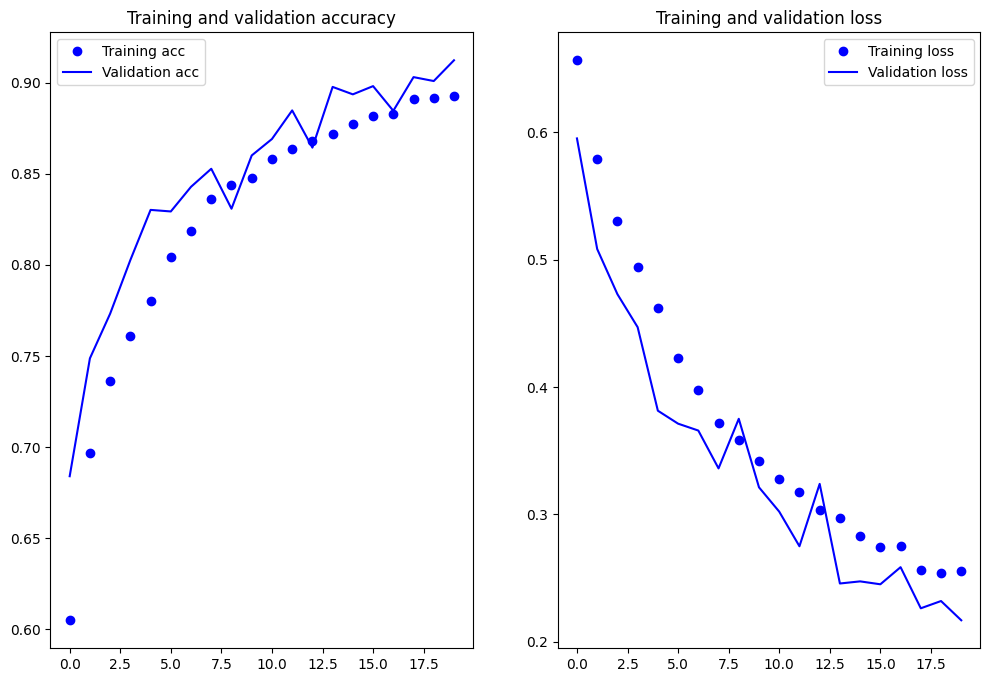

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', as_supervised=True)

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = image / 255.0
    return image, label

# Apply preprocessing and data augmentation
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
])

# Create the model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

# Report the accuracy on your test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

# Plot the loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
